In [31]:
import kagglehub
import os

# 📌 Step 1: Download Dataset
dataset_dir = kagglehub.dataset_download("salader/dogs-vs-cats")
print("Dataset downloaded at:", dataset_dir)

# 📌 Step 2: Define Correct Paths
train_path = os.path.join(dataset_dir, "train")
test_path = os.path.join(dataset_dir, "test")

# 📌 Step 3: Verify Directory Exists
print("Train Path:", train_path)
print("Test Path:", test_path)

# Check if train and test directories exist
if not os.path.exists(train_path) or not os.path.exists(test_path):
    raise FileNotFoundError("Train/Test directories not found! Check dataset structure.")

# 📌 Step 4: Continue with DataLoader & Model Training (Use train_path & test_path)


Dataset downloaded at: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1
Train Path: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train
Test Path: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# 📌 Step 5: Load Dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Classes:", train_dataset.classes)  # Check class labels

# 📌 Step 6: Define CNN Model with BatchNorm & Dropout
class DogCatClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layer(x)

model = DogCatClassifier().to(device)


Using device: cpu


NameError: name 'train_path' is not defined

In [3]:

# 📌 Step 7: Define Loss Function & Optimizer
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss (for binary classification)
optimizer = optim.Adam(model.parameters(), lr=0.001)


NameError: name 'model' is not defined

In [34]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, torch.round(y_pred).view(-1)).sum().item()
    return (correct/len(y_true))* 100

In [35]:


# 📌 Step 9: Train the Model & Plot Accuracy
train_losses, train_accuracies, test_accuracies = [], [], []
epochs = 10  # Set desired epochs

for epoch in tqdm(range(epochs)):
    model.train()
    train_loss = 0
    train_accuracy = 0
    test_accuracy = 0

    for images, labels in tqdm(train_dataloader, leave=False):
        images, labels = images.to(device), labels.float().to(device)  # Move to GPU

        optimizer.zero_grad()
        y_pred = model(images)
        loss = loss_fn(y_pred.view(-1), labels)
        train_loss += loss.item()
        train_accuracy += accuracy_fn(labels, y_pred)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.inference_mode():
        for images, labels in tqdm(test_dataloader, leave=False):
            images, labels = images.to(device), labels.float().to(device)
            y_pred = model(images)
            test_accuracy += accuracy_fn(labels, y_pred)

    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
    test_accuracy /= len(test_dataloader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%")



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 1/10, Train Loss: 0.9831, Train Acc: 65.03%, Test Acc: 70.52%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2/10, Train Loss: 0.5358, Train Acc: 73.36%, Test Acc: 77.35%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3/10, Train Loss: 0.4889, Train Acc: 76.56%, Test Acc: 76.31%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4/10, Train Loss: 0.4438, Train Acc: 79.38%, Test Acc: 79.78%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5/10, Train Loss: 0.4101, Train Acc: 81.42%, Test Acc: 82.52%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 6/10, Train Loss: 0.3864, Train Acc: 82.47%, Test Acc: 82.96%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 7/10, Train Loss: 0.3639, Train Acc: 83.78%, Test Acc: 84.20%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 8/10, Train Loss: 0.3378, Train Acc: 85.48%, Test Acc: 85.27%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 9/10, Train Loss: 0.3161, Train Acc: 86.39%, Test Acc: 84.24%


  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 10/10, Train Loss: 0.2944, Train Acc: 87.17%, Test Acc: 81.01%


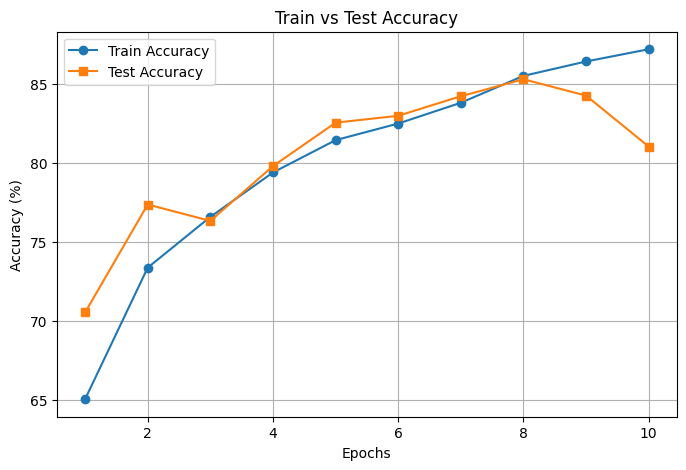

In [36]:

# 📌 Step 10: Plot Train vs Test Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "dog_cat_calssifier.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/dog_cat_calssifier.pth


In [38]:
from google.colab import files

# Path to your saved model
model_path = "/content/models/dog_cat_calssifier.pth"

# Download the model
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>